# Residential Energy Appliance Classification


Creator:
    - Family Name: WANG
    - Given Name: ZHIYIN

Programming Language: R 4.0.5 in Jupyter Notebook


# Background Information
## 1 Introduction
Energy production/consumption is the largest source of greenhouse gas emissions. Energy efficiency
plays a crucial role in the transformation of future energy systems and cutting the rapid growth
of global energy demand to able early decommissioning of fossil-fuel power plants and combat
climate change. Electricity consumption in residential sectors accounts for more than 20% of total
consumption, and thus energy-saving technology for residential buildings is of vital importance.
Choosing the right time to consume the right amount of electricity will increase energy efficiency
and reduce emissions.<br><br>
Load monitoring (also known as load detection and load disaggregation) is a promising technique to provide detailed electricity consumption information and usage of individual appliances in
residential buildings. An illustrative example of load monitoring for appliances, such as refrigerator, oven, and stove, is shown in Figure 1. Take the oven as an example. When the oven is turned on, it is used for a period of time until being turned off. A more recent review of load monitoring can be found in the paper entitled "Performance evaluation in non-intrusive load monitoring:
Datasets, metrics, and tools-A review".
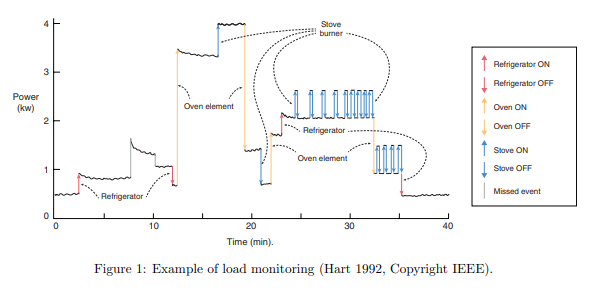
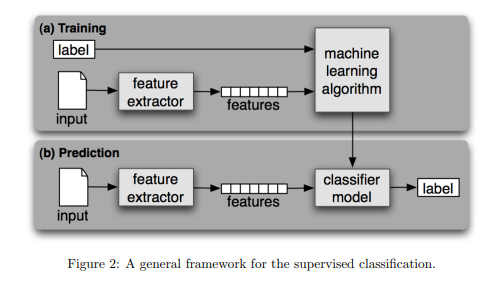
## 2 Aim
The aim of this challenge is to develop multiple classifers for each individual target appliance that can detect whether target appliances are being used in each time interval (e.g. 1-minute interval) as correctly as possible.


In [1]:
#install.packages("caret")
#install.packages("e1071")
#install.packages("measures")
#install.packages("Metrics")
#install.packages("rpart")
# libraries
library(ggplot2)  # plot
library(measures) # F1
library(Metrics) # Precision & recall
library(caret) # cv and train
library(e1071) # svm
#load all the libraries
#install.packages("tree")
#install.packages("randomForest")
#install.packages("gbm")
#install.packages("glmnet")
library(tree)
library(randomForest)
library(glmnet)
library(gbm)
library(ROSE)
#library(ISLR)

Loading required package: lattice


Attaching package: 'caret'


The following objects are masked from 'package:Metrics':

    precision, recall


The following objects are masked from 'package:measures':

    MAE, RMSE


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: Matrix

Loaded glmnet 4.1-1

Loaded gbm 2.1.8

Loaded ROSE 0.0-3




## 1.  Exploratory Data Analysis

In [2]:
# import train and test data
train  <- read.csv("train_data_withlabels.csv")
test <- read.csv("test_data_nolabels.csv")

In [10]:
# inspect the train dataset
head(train)
str(train)
summary(train)

X      load  ac ev oven wash dryer hourofday dayofweek dif    absdif max  
1 105541 2.245 0  0  0    0    0     0         Sun        0.987 0.987  6.215
2 105542 2.259 0  0  0    0    0     0         Sun        0.014 0.014  6.215
3 105543 2.269 0  0  0    0    0     0         Sun        0.010 0.010  6.215
4 105544 2.268 0  0  0    0    0     0         Sun       -0.001 0.001  6.215
5 105545 2.270 0  0  0    0    0     0         Sun        0.002 0.002  6.215
6 105546 2.259 0  0  0    0    0     0         Sun       -0.011 0.011  6.215
  var      entropy   nonlinear  hurst    
1 3.074549 0.6788858 0.05290291 0.9940715
2 3.172867 0.6674503 0.05482926 0.9941540
3 3.270112 0.6477770 0.05699074 0.9942200
4 3.303763 0.6292270 0.05760593 0.9941497
5 3.302744 0.6212951 0.08263997 0.9940406
6 3.298258 0.6269564 0.08978753 0.9939864

'data.frame':	417720 obs. of  16 variables:
 $ X        : int  105541 105542 105543 105544 105545 105546 105547 105548 105549 105550 ...
 $ load     : num  2.25 2.26 2.27 2.27 2.27 ...
 $ ac       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ev       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ oven     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ wash     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dryer    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hourofday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ dayofweek: chr  "Sun" "Sun" "Sun" "Sun" ...
 $ dif      : num  0.987 0.014 0.01 -0.001 0.002 ...
 $ absdif   : num  0.987 0.014 0.01 0.001 0.002 ...
 $ max      : num  6.21 6.21 6.21 6.21 6.21 ...
 $ var      : num  3.07 3.17 3.27 3.3 3.3 ...
 $ entropy  : num  0.679 0.667 0.648 0.629 0.621 ...
 $ nonlinear: num  0.0529 0.0548 0.057 0.0576 0.0826 ...
 $ hurst    : num  0.994 0.994 0.994 0.994 0.994 ...


       X               load              ac               ev         
 Min.   :105541   Min.   : 0.298   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:209971   1st Qu.: 0.807   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :314400   Median : 1.279   Median :0.0000   Median :0.00000  
 Mean   :314400   Mean   : 2.185   Mean   :0.2423   Mean   :0.00559  
 3rd Qu.:418830   3rd Qu.: 3.358   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :523260   Max.   :11.794   Max.   :1.0000   Max.   :1.00000  
      oven              wash             dryer          hourofday    
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   : 0.00  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.: 5.00  
 Median :0.00000   Median :0.00000   Median :0.0000   Median :11.00  
 Mean   :0.01426   Mean   :0.01904   Mean   :0.0325   Mean   :11.48  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:17.00  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000   Max.   :23.00  
  dayofweek         

In [ ]:
# inspect the test dataset
head(test)
str(test)
summary(test)

X load  hourofday dayofweek dif    absdif max var entropy nonlinear hurst
1 1 1.869 0         Mon        0.000 0.000  0   0   0       0         0    
2 2 1.673 0         Mon       -0.196 0.196  0   0   0       0         0    
3 3 1.660 0         Mon       -0.013 0.013  0   0   0       0         0    
4 4 1.772 0         Mon        0.112 0.112  0   0   0       0         0    
5 5 1.679 0         Mon       -0.093 0.093  0   0   0       0         0    
6 6 1.775 0         Mon        0.096 0.096  0   0   0       0         0

'data.frame':	105540 obs. of  11 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ load     : num  1.87 1.67 1.66 1.77 1.68 ...
 $ hourofday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ dayofweek: chr  "Mon" "Mon" "Mon" "Mon" ...
 $ dif      : num  0 -0.196 -0.013 0.112 -0.093 ...
 $ absdif   : num  0 0.196 0.013 0.112 0.093 ...
 $ max      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ var      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ entropy  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nonlinear: num  0 0 0 0 0 0 0 0 0 0 ...
 $ hurst    : num  0 0 0 0 0 0 0 0 0 0 ...


       X               load          hourofday      dayofweek        
 Min.   :     1   Min.   : 0.417   Min.   : 0.00   Length:105540     
 1st Qu.: 26386   1st Qu.: 0.986   1st Qu.: 6.00   Class :character  
 Median : 52771   Median : 1.393   Median :12.00   Mode  :character  
 Mean   : 52771   Mean   : 1.723   Mean   :11.52                     
 3rd Qu.: 79155   3rd Qu.: 1.759   3rd Qu.:18.00                     
 Max.   :105540   Max.   :12.174   Max.   :23.00                     
      dif                absdif            max              var          
 Min.   :-5.658000   Min.   :0.0000   Min.   : 0.000   Min.   :0.000000  
 1st Qu.:-0.007000   1st Qu.:0.0020   1st Qu.: 1.504   1st Qu.:0.004252  
 Median : 0.000000   Median :0.0070   Median : 2.462   Median :0.082662  
 Mean   :-0.000006   Mean   :0.1089   Mean   : 3.121   Mean   :0.884685  
 3rd Qu.: 0.006000   3rd Qu.:0.0300   3rd Qu.: 4.801   3rd Qu.:1.693558  
 Max.   : 6.816000   Max.   :6.8160   Max.   :12.174   Max.   :9.1

In [80]:
# check if there is na
sum(is.na(train))

[1] 0

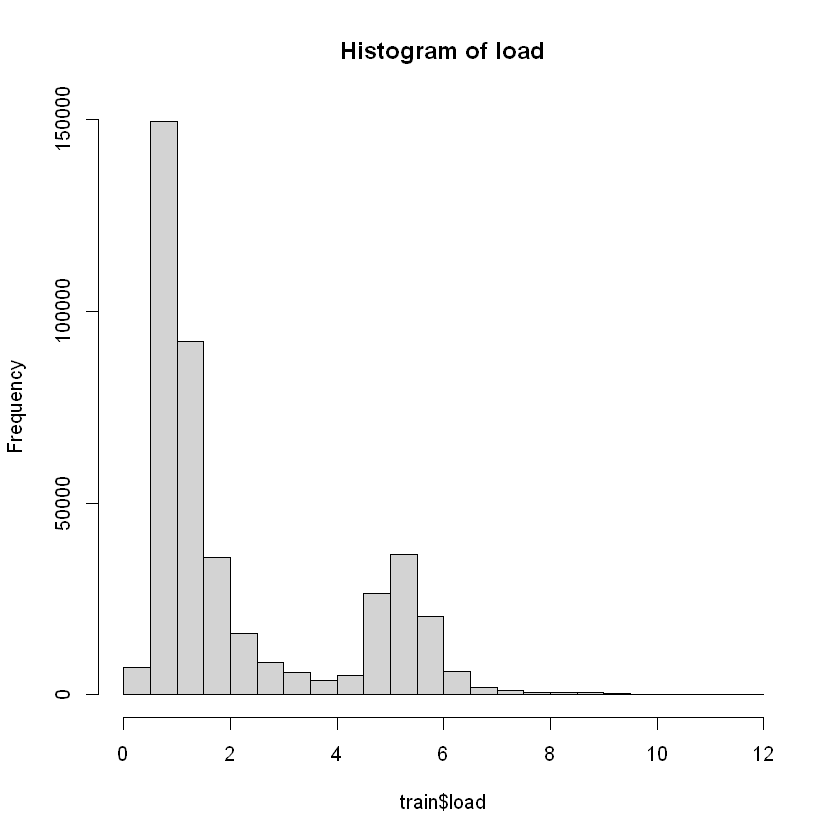

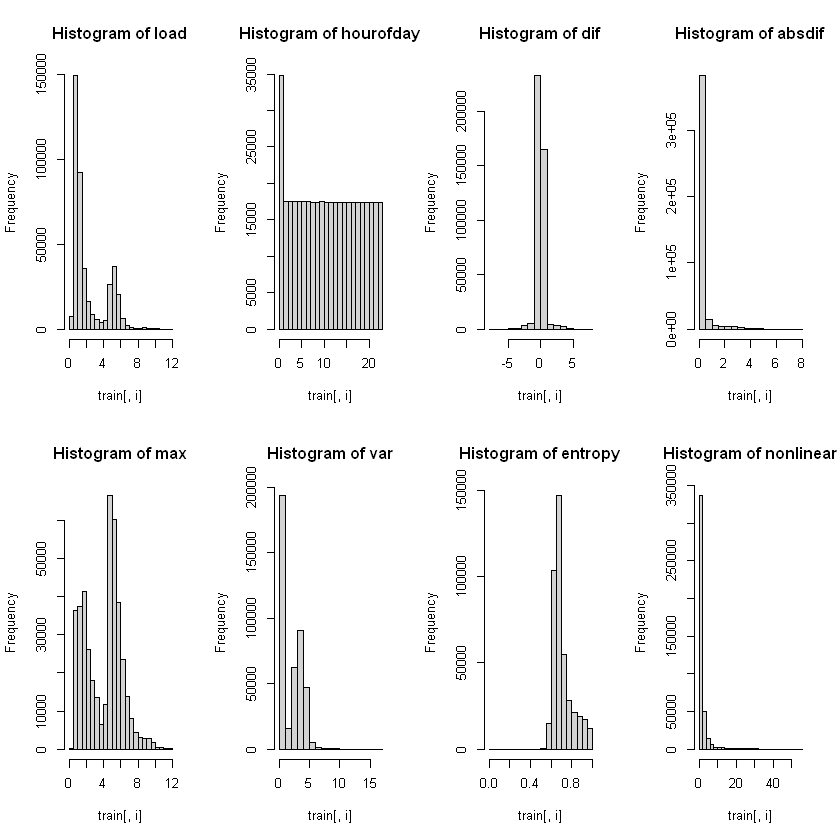

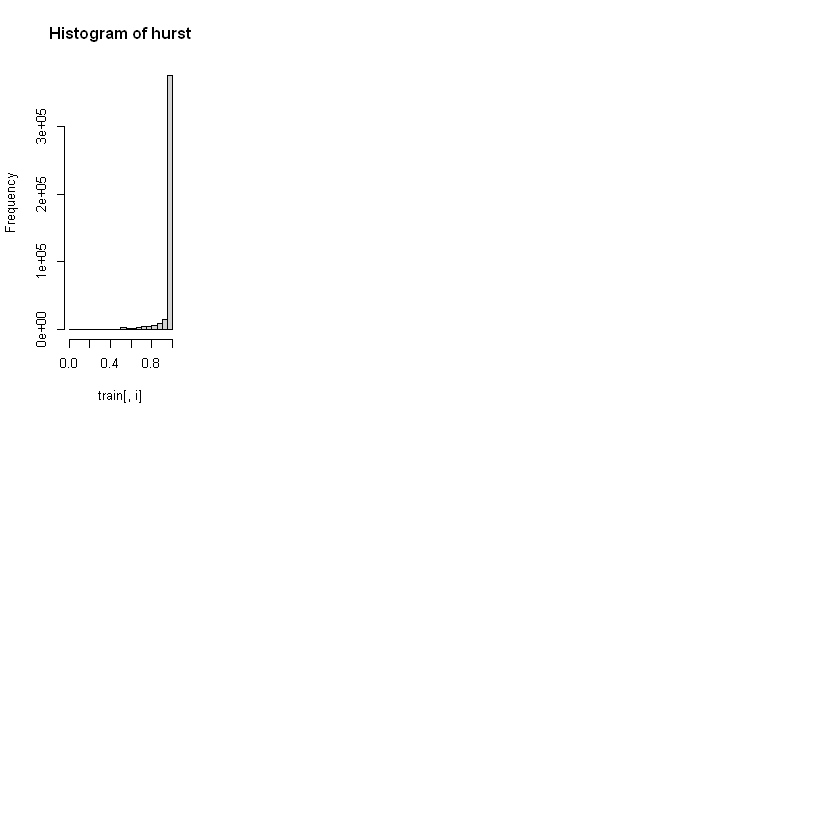

In [84]:
par(mfrow = c(2,4))
# plot features on histogram
for (i in colnames(train)[-c(1,3:7,9)]){
    hist(train[,i], main = paste0("Histogram of"," ", i))
}

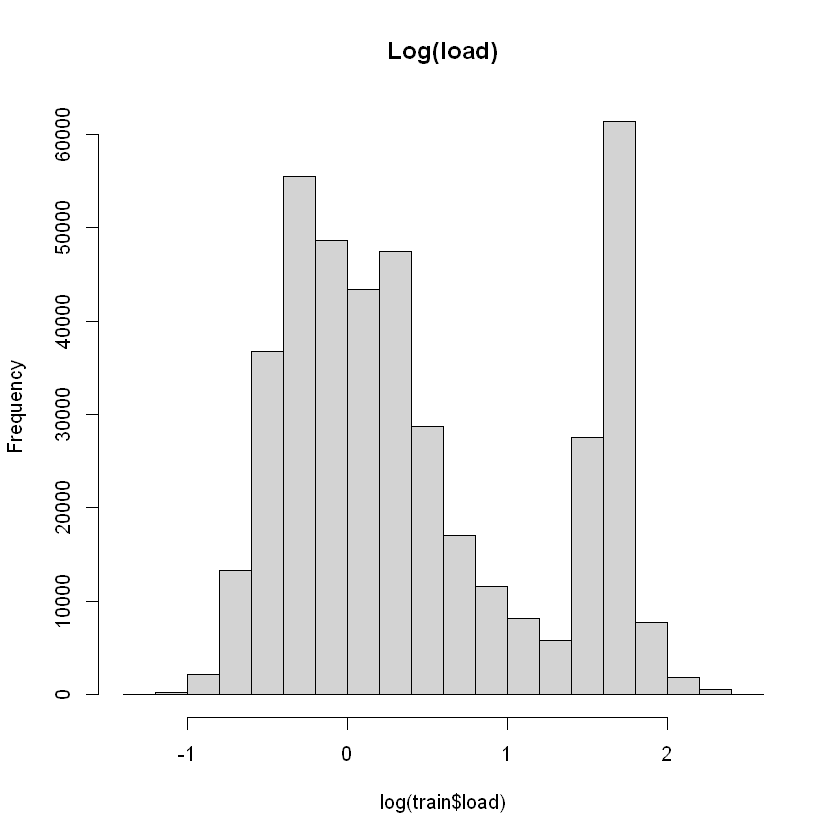

In [ ]:
# transform load
hist(log(train$load), main = "Log(load)")

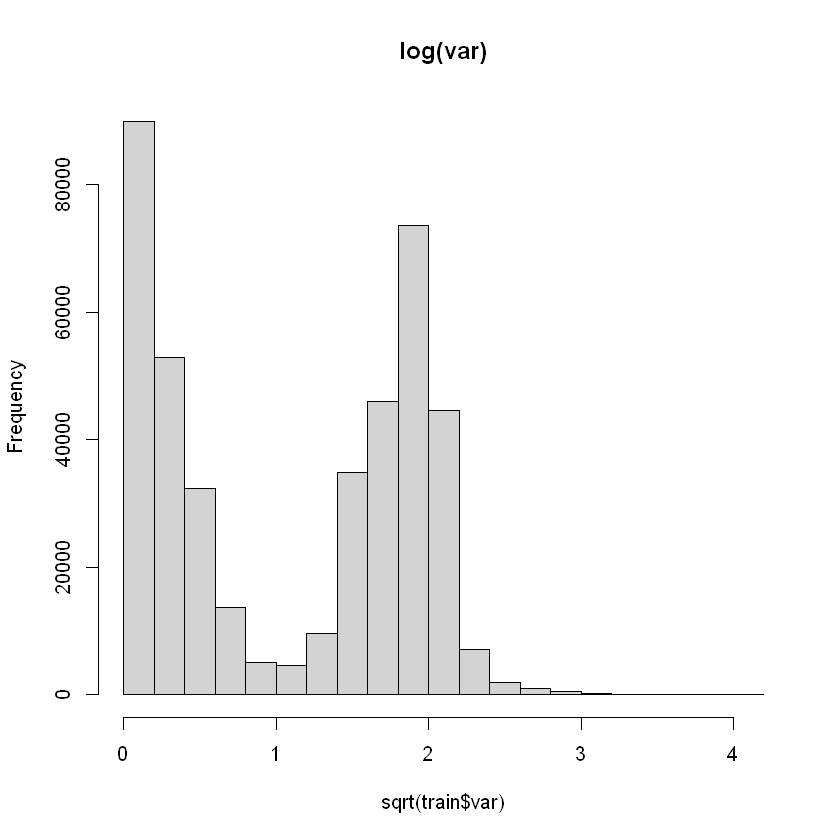

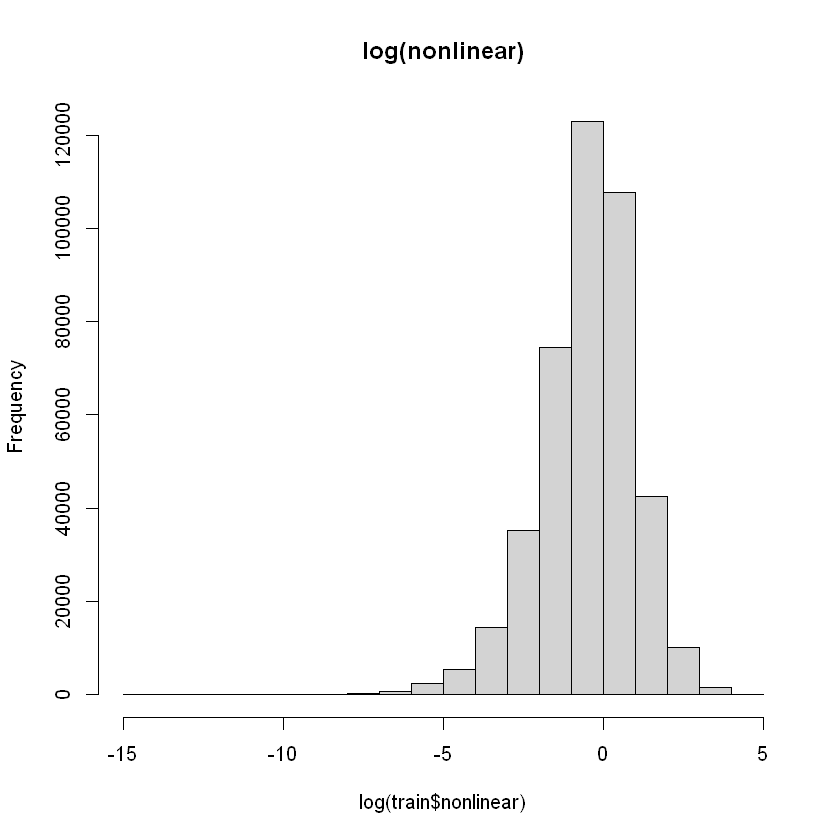

In [ ]:
# transform features
hist(sqrt(train$var), main = "log(var)")
hist(log(train$nonlinear), main = "log(nonlinear)")

In [ ]:
# Correlation Coefficients of each pair
cor(train[,-9][2:15])

load        ac           ev            oven         wash        
load       1.00000000  0.908138189  0.1326114177  0.198625965  0.038059818
ac         0.90813819  1.000000000 -0.0023748567  0.036528731  0.001360042
ev         0.13261142 -0.002374857  1.0000000000 -0.007392142 -0.010445159
oven       0.19862596  0.036528731 -0.0073921417  1.000000000  0.010727688
wash       0.03805982  0.001360042 -0.0104451586  0.010727688  1.000000000
dryer      0.05539912  0.005924052 -0.0001608067  0.016674606  0.065053395
hourofday  0.26677024  0.151363856  0.0531388114  0.085837017  0.044965107
dif        0.14041606  0.135890206  0.0026146738  0.067146768  0.005052999
absdif     0.19115994  0.191701501  0.0029212323  0.188436612  0.011816291
max        0.58936206  0.518319001  0.1011763887  0.185083299  0.027232132
var        0.46218324  0.493826098  0.0123976061  0.095902672 -0.006345821
entropy   -0.04582827 -0.164815279  0.0030039491  0.112254191  0.028599082
nonlinear -0.11348796 -0.100161803  0.0156435222 -0.031538227 -0.022147994
hurst      0.02441989  0.117848393 -0.0155112977 -0.054968441 -0.001120550
          dryer         hourofday     dif           absdif        max         
load       0.0553991249  0.2667702417  0.1404160609  0.1911599441  0.589362058
ac         0.0059240522  0.1513638555  0.1358902060  0.1917015010  0.518319001
ev        -0.0001608067  0.0531388114  0.0026146738  0.0029212323  0.101176389
oven       0.0166746063  0.0858370175  0.0671467679  0.1884366120  0.185083299
wash       0.0650533949  0.0449651073  0.0050529994  0.0118162913  0.027232132
dryer      1.0000000000  0.0705956220  0.0008338968  0.0098388680  0.042264797
hourofday  0.0705956220  1.0000000000  0.0008041921  0.0621089902  0.243538935
dif        0.0008338968  0.0008041921  1.0000000000  0.1589606291  0.000290635
absdif     0.0098388680  0.0621089902  0.1589606291  1.0000000000  0.219057642
max        0.0422647966  0.2435389346  0.0002906350  0.2190576422  1.000000000
var       -0.0058884137  0.1258062362  0.0002447861  0.1872464786  0.849075318
entropy    0.0280044928  0.1082255633 -0.0003161304  0.0406189471 -0.167181470
nonlinear -0.0277311041 -0.0901488139  0.0031565646 -0.0610027243 -0.148558678
hurst     -0.0246036771 -0.0904056338  0.0007958911 -0.0006664814  0.128823335
          var           entropy       nonlinear    hurst        
load       0.4621832352 -0.0458282669 -0.113487956  0.0244198911
ac         0.4938260976 -0.1648152793 -0.100161803  0.1178483929
ev         0.0123976061  0.0030039491  0.015643522 -0.0155112977
oven       0.0959026718  0.1122541913 -0.031538227 -0.0549684405
wash      -0.0063458205  0.0285990822 -0.022147994 -0.0011205496
dryer     -0.0058884137  0.0280044928 -0.027731104 -0.0246036771
hourofday  0.1258062362  0.1082255633 -0.090148814 -0.0904056338
dif        0.0002447861 -0.0003161304  0.003156565  0.0007958911
absdif     0.1872464786  0.0406189471 -0.061002724 -0.0006664814
max        0.8490753176 -0.1671814697 -0.148558678  0.1288233352
var        1.0000000000 -0.3799706878 -0.192372233  0.2756122458
entropy   -0.3799706878  1.0000000000  0.118600763 -0.6755421776
nonlinear -0.1923722327  0.1186007629  1.000000000 -0.0888261462
hurst      0.2756122458 -0.6755421776 -0.088826146  1.0000000000

apart from ac:load, ac:max, ac:var, all other has very low correlation, it would be hard to build a good linear model for classification task.

## 2. Model Development

### 2.1. ac	

#### neueral network by h2o 

In [46]:
options(warn=-1)
# load library
library(h2o)
library(ggplot2)
library(tidyr)
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE) # initialize h2o


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\ALANWA~1\AppData\Local\Temp\Rtmpa8KmcQ\file1c9834e93415/h2o_Alan_Wang_started_from_r.out
    C:\Users\ALANWA~1\AppData\Local\Temp\Rtmpa8KmcQ\file1c987c953453/h2o_Alan_Wang_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 827 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    9 days  
    H2O cluster name:           H2O_started_from_R_Alan_Wang_wtu556 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.33 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       

In [3]:
# build a neural network classifier based on the labeled data
nn.build <- function(data, Truelabel){
    # dataframe to store errors
    train.error <- data.frame(K = seq(2,10,2), F1 = 0) 
    # count variable
    i = 1 
    
    # define number of hidden unit as k 
    for (k in seq(2, 10, 2)){
        # create nn model
        NN.model <- h2o.deeplearning(    
            x = 2:ncol(data), # select all features
            y = 1,
            training_frame = data, # specify the frame (imported file)    
            hidden = c(k), # number of layers and their units
            epochs = 50, # maximum number of epoches  
            activation = 'Tanh', # activation function 
            autoencoder = FALSE, # is it an autoencoder? NO!
            l2 = 0.1
        )

        # predict train labels using the model 
        train.predict <- h2o.predict(NN.model, data)$predict
        train.predict <- as.numeric(as.vector(train.predict[,1]))

        # calcualte and record the error
        train.error[i,2] <- F1(Truelabel, train.predict, positive = 1)
        # update counter
        i <- i + 1  
    }
    return (train.error)
}

In [48]:
# load labeled data in h2o format
labeled.frame <- h2o.importFile(path = './train_data_withlabels.csv' ,sep=',') 
test.frame <- h2o.importFile(path = './test_data_nolabels.csv' ,sep=',') 

# subset data
ac.data  <- labeled.frame[,c("ac","load", "hourofday", "dayofweek", "dif", "absdif", "max", "var", "entropy", "nonlinear", "hurst")]
ac.data$ac <- as.factor(ac.data$ac) # label as factor

  |======================================================================| 100%
  |======================================================================| 100%


In [49]:
# train nn model on given data and features, record the error
ac.train.error <- nn.build(ac.data, train$ac)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [50]:
# check error
ac.train.error

K  F1       
1  2 0.9623044
2  4 0.9570327
3  6 0.9585846
4  8 0.9574045
5 10 0.9594626

K = 4 gives the best result

In [ ]:
NN.model <- h2o.deeplearning(    
            x = 2:ncol(ac.data), # select all features
            y = 1,
            training_frame = ac.data, # specify the frame (imported file)    
            hidden = c(4), # number of layers and their units
            epochs = 50, # maximum number of epoches  
            activation = 'Tanh', # activation function 
            autoencoder = FALSE, # is it an autoencoder? NO!
            l2 = 0.1
)

# predict train labels using the model 
predict <- h2o.predict(NN.model, ac.data)$predict

In [ ]:
table(train$ac, as.vector(predict[,1]))

#### Classification Tree

No need to include any interaction between variables, as the tree itself is build on the format of interactions.

In [4]:
# build the tree on training data
train$ac <- as.factor(train$ac)
tree.ac <- tree(ac ~ load + hourofday + dif + absdif + max + var + entropy + nonlinear + hurst, data = train) 

In [5]:
# produce summary statistics about the tree
summary(tree.ac)


Classification tree:
tree(formula = ac ~ load + hourofday + dif + absdif + max + var + 
    entropy + nonlinear + hurst, data = train)
Variables actually used in tree construction:
[1] "load"   "absdif" "hurst" 
Number of terminal nodes:  4 
Residual mean deviance:  0.1361 = 56860 / 417700 
Misclassification error rate: 0.0233 = 9734 / 417720 

The tree only uses 3 variables 
* load
* absdif
* hurst

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.0233 for this classification tree. There are 4 terminal nodes in this tree.

null device 
          1

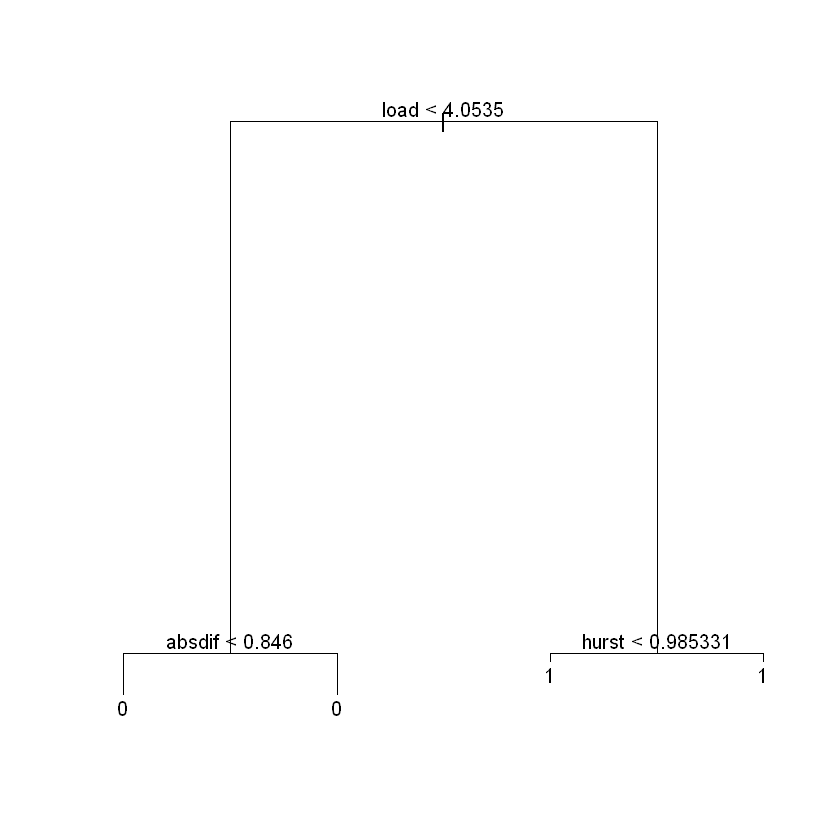

In [6]:
# visualize the tree
plot(tree.ac)
text(tree.ac, pretty = 0)
dev.off()

Load is the most important variable of the tree. 

If load <4.0535, the tree predicts 0. 

If load >4.0535, the tree predicts 1. 

In [7]:
# dataframe to store errors
tree.error <- data.frame(Tree_type = NA, F1 = 0) 

# function to record error for classification tree
tree_error_record <- function(tree, Truelabel, test_data, tree_name){
    # dataframe to store error
    error <- data.frame(Tree_type = NA, F1 = 0)
    # make prediction on train data
    tree.predict <- predict(tree, test_data, type="class")
    # calculate F1       
    error[1,1] <- tree_name    # model type
    error[1,2] <- F1(Truelabel, tree.predict, 1) 
    return(error)
}

# record error for tree.ac
tree.error[1,] <- tree_error_record(tree.ac, train$ac, train, "tree.ac")

In [8]:
# check train error of tree
tree.error

Tree_type F1       
1 tree.ac   0.9513908

In [9]:
# confusion matrix
cm.ac <- confusionMatrix(data = predict(tree.ac, train, type = "class"), reference = train$ac, positive = "1", mode = "prec_recall")
cm.ac

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 312728   5941
         1   3793  95258
                                          
               Accuracy : 0.9767          
                 95% CI : (0.9762, 0.9772)
    No Information Rate : 0.7577          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9361          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
              Precision : 0.9617          
                 Recall : 0.9413          
                     F1 : 0.9514          
             Prevalence : 0.2423          
         Detection Rate : 0.2280          
   Detection Prevalence : 0.2371          
      Balanced Accuracy : 0.9647          
                                          
       'Positive' Class : 1               
                                          

#### random forest

In [9]:
# the data set is highly imbalanced
table(train$ac)


     0      1 
316521 101199 

In [10]:
train$ac <- as.factor(train$ac)
# generate data synthetically use ROSE 
ac_balanced_under <- ovun.sample(ac ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, method = "under", N = 101199*2, seed = 1)$data
table(ac_balanced_under$ac)


     0      1 
101199 101199 


Call:
 randomForest(formula = ac ~ load + hourofday + dif + absdif +      max + var + entropy + nonlinear + hurst, data = ac_balanced_under,      ntree = 200, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.6%
Confusion matrix:
       0      1 class.error
0 100455    744 0.007351851
1    465 100734 0.004594907

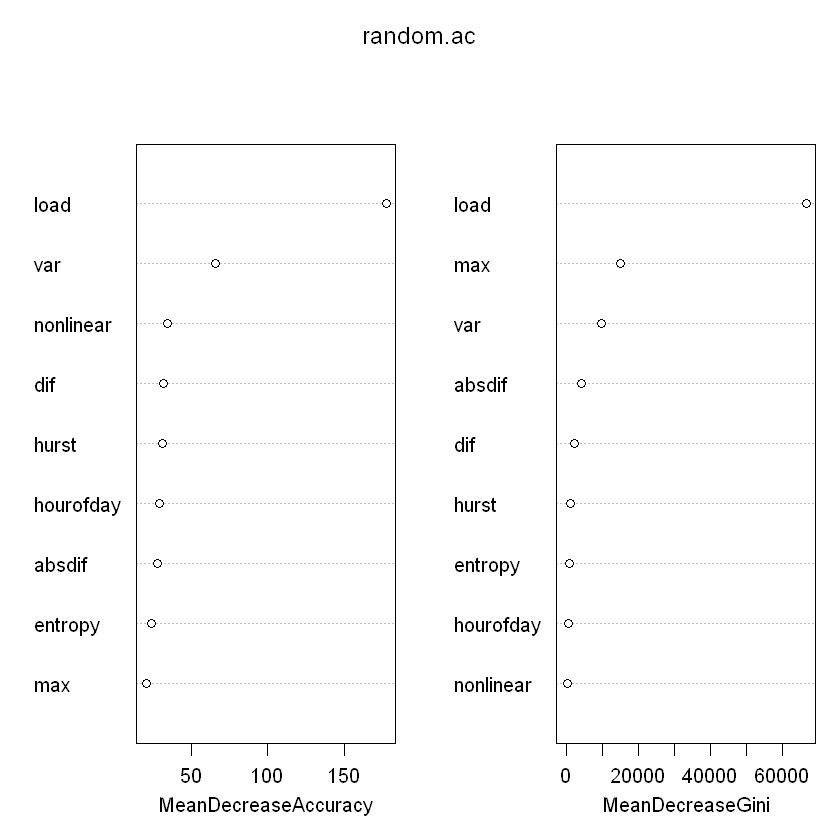

In [11]:
# use random forest to classify
random.ac <- randomForest(ac ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = ac_balanced_under, ntree = 200, mtry=3, importance=TRUE)
# check the results 
random.ac

# plot importance of variable
varImpPlot(random.ac)

The former is based
upon the mean decrease of accuracy in predictions on the out of bag samples
when a given variable is excluded from the model. The latter is a measure
of the total decrease in node impurity that results from splits over that
variable, averaged over all trees

load is the most important variable.

In [12]:
# record error for tree
tree.error[2,] <- tree_error_record(random.ac, train$ac, train, "random.ac")

# check error
tree.error

Tree_type F1       
1 tree.ac   0.9513908
2 random.ac 0.9921908

In [13]:
# random forest with original dataset
random.ac2 <-  randomForest(ac ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, ntree = 100, mtry=3, importance=TRUE)
tree_error_record(random.ac2, train$ac, train, "random.ac")

Tree_type F1
1 random.ac 1

#### svm

In [ ]:
library(e1071)

In [ ]:
svm.ac <- svm(ac ~ load + max + var, data = train, kernel = "linear", cost = 10)
summary(svm.ac)

In [ ]:
svm(ac ~ load + max + var, data = train, kernel = "polynomial", degree = 2, cost = 10)

In [26]:
# prediction function that returns F1 measurements
svm.prediction <- function(model, test_data, Truelabel, model_name){
    # dataframe to store results
    error <- data.frame(Model_name = NA, F1 = 0) 
    
    # calculate prediction
    predict <- predict(model, test_data)
    # calculate F1, precision and recall        
    error[1,1] <- model_name    # model type
    error[1,2] <- F1(Truelabel, predict, 1)  # F1
    return(error)
}

In [ ]:
svm.prediction(svm.ac, train, train$ac, "svm.ac")

In [18]:
train$ac <- as.factor(train$ac)
glm.fits=glm(ac ~ hourofday + absdif + max + var + entropy + nonlinear + hurst + log(load) + sqrt(var)
             , data=train, family = binomial)
summary(glm.fits)
glm.probs <- predict(glm.fits,type="response")
glm.probs[glm.probs>.5] <-  1
glm.probs[glm.probs<.5] <-  0
F1(train$ac, glm.probs, 1)


Call:
glm(formula = ac ~ hourofday + absdif + max + var + entropy + 
    nonlinear + hurst + log(load) + sqrt(var), family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2391  -0.0285  -0.0062  -0.0004   5.0088  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.667784   0.268566  -6.210 5.30e-10 ***
hourofday   -0.083026   0.002169 -38.281  < 2e-16 ***
absdif       0.526781   0.016822  31.314  < 2e-16 ***
max         -0.183571   0.011333 -16.198  < 2e-16 ***
var          0.185356   0.034306   5.403 6.55e-08 ***
entropy     -7.878823   0.195300 -40.342  < 2e-16 ***
nonlinear    0.076165   0.007960   9.569  < 2e-16 ***
hurst       -2.663975   0.184757 -14.419  < 2e-16 ***
log(load)    7.560935   0.042622 177.397  < 2e-16 ***
sqrt(var)    1.407306   0.083259  16.903  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 

[1] 0.9642727

In [31]:
train$dryer <- as.factor(train$dryer)
glm.fits=glm(dryer ~ hourofday + absdif + max + var + entropy + nonlinear + hurst + log(load) + sqrt(var)
             , data=train, family = binomial)
summary(glm.fits)
glm.probs <- predict(glm.fits,type="response")
glm.probs[glm.probs>.5] <-  1
glm.probs[glm.probs<.5] <-  0
F1(train$dryer, glm.probs, 1)


Call:
glm(formula = dryer ~ hourofday + absdif + max + var + entropy + 
    nonlinear + hurst + log(load) + sqrt(var), family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8245  -0.2810  -0.2297  -0.1871   3.7240  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.474350   0.216566 -16.043  < 2e-16 ***
hourofday    0.036956   0.001442  25.631  < 2e-16 ***
absdif      -0.024652   0.017101  -1.442  0.14942    
max          0.190235   0.008062  23.597  < 2e-16 ***
var         -0.073818   0.022970  -3.214  0.00131 ** 
entropy     -0.583192   0.132866  -4.389 1.14e-05 ***
nonlinear   -0.099804   0.005898 -16.922  < 2e-16 ***
hurst       -0.117424   0.149619  -0.785  0.43256    
log(load)    0.418413   0.015099  27.711  < 2e-16 ***
sqrt(var)   -0.587124   0.057745 -10.168  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to 

[1] 0

### 2.2. ev	

#### logistic model

In [14]:
train$ev <- as.factor(train$ev)

glm.fits=glm(ev ~ hourofday + absdif + max + var + entropy + nonlinear + hurst + log(load) + sqrt(var)
             , data=train, family = binomial)
summary(glm.fits)


Call:
glm(formula = ev ~ hourofday + absdif + max + var + entropy + 
    nonlinear + hurst + log(load) + sqrt(var), family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5628  -0.0782  -0.0325  -0.0187   4.4411  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.022262   0.330799  -3.090    0.002 ** 
hourofday    0.034198   0.005073   6.741 1.57e-11 ***
absdif      -0.203684   0.047363  -4.300 1.70e-05 ***
max          0.625901   0.016550  37.819  < 2e-16 ***
var          0.643693   0.033250  19.359  < 2e-16 ***
entropy     -8.385544   0.256660 -32.672  < 2e-16 ***
nonlinear    0.094906   0.006368  14.904  < 2e-16 ***
hurst       -1.421864   0.254946  -5.577 2.45e-08 ***
log(load)    1.975528   0.065693  30.072  < 2e-16 ***
sqrt(var)   -3.546888   0.092381 -38.394  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 

In [15]:
glm.probs <- predict(glm.fits,type="response")

In [16]:
glm.probs[glm.probs>.5] <-  1
glm.probs[glm.probs<.5] <-  0

In [17]:
F1(train$ev, glm.probs, 1)

[1] 0.07491221

#### Classification Tree

In [20]:
# build the tree on training data
train$ev <- as.factor(train$ev)
tree.ev <- tree(ev ~ load + hourofday + dif + absdif + max + var + entropy + nonlinear + hurst, data = train ) 

Warning message in tree(ev ~ load + hourofday + dayofweek + dif + absdif + max + :
"NAs introduced by coercion"


In [21]:
# produce summary statistics about the tree
summary(tree.ev)


Classification tree:
tree(formula = ev ~ load + hourofday + dayofweek + dif + absdif + 
    max + var + entropy + nonlinear + hurst, data = train)
Variables actually used in tree construction:
[1] "load"      "var"       "hourofday" "max"       "hurst"    
Number of terminal nodes:  14 
Residual mean deviance:  0.02649 = 11060 / 417700 
Misclassification error rate: 0.003684 = 1539 / 417720 

The tree uses 5 variables 
* load
* var
* hourofday
* max
* hurst

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.003684 for this classification tree. There are 14 terminal nodes in this tree.

null device 
          1

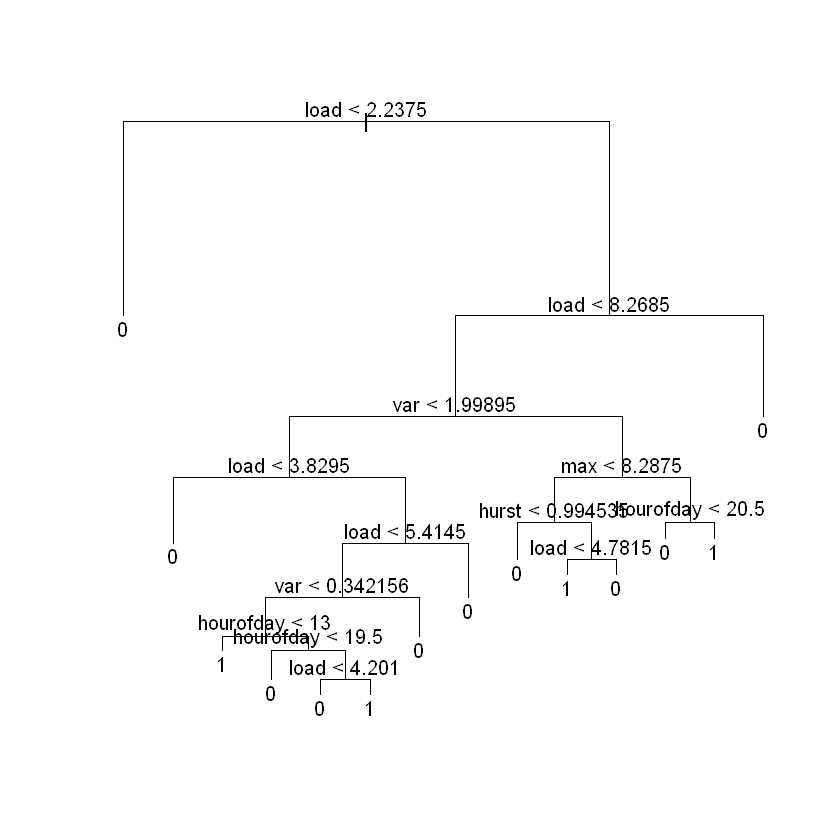

In [22]:
# visualize the tree
plot(tree.ev)
text(tree.ev, pretty = 0)
dev.off()

Load is the most important variable of the tree. The top two nodes are load

If load <2.2375 or > 8.2685 , the tree predicts 0. 

The next important variable is var. Which is a variable that was included in tree.ac.

In [23]:
# record error for tree.ev
tree.error[3,] <- tree_error_record(tree.ev, train$ev, train, "tree.ev")

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


In [24]:
# check train error of tree
tree.error

Tree_type F1       
1 tree.ac   0.9513908
2 random.ac 0.9999061
3 tree.ev   0.5616633

high variability, very sensitive to feature values, slightly change lead to different results, reduce reliability

tree can handle outliers very well. do not need any asumption on data

In [25]:
# cross validation and do pruning on the tree
tree.cv.ev <- cv.tree(tree.ev, FUN = prune.misclass) # do pruning

Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tre

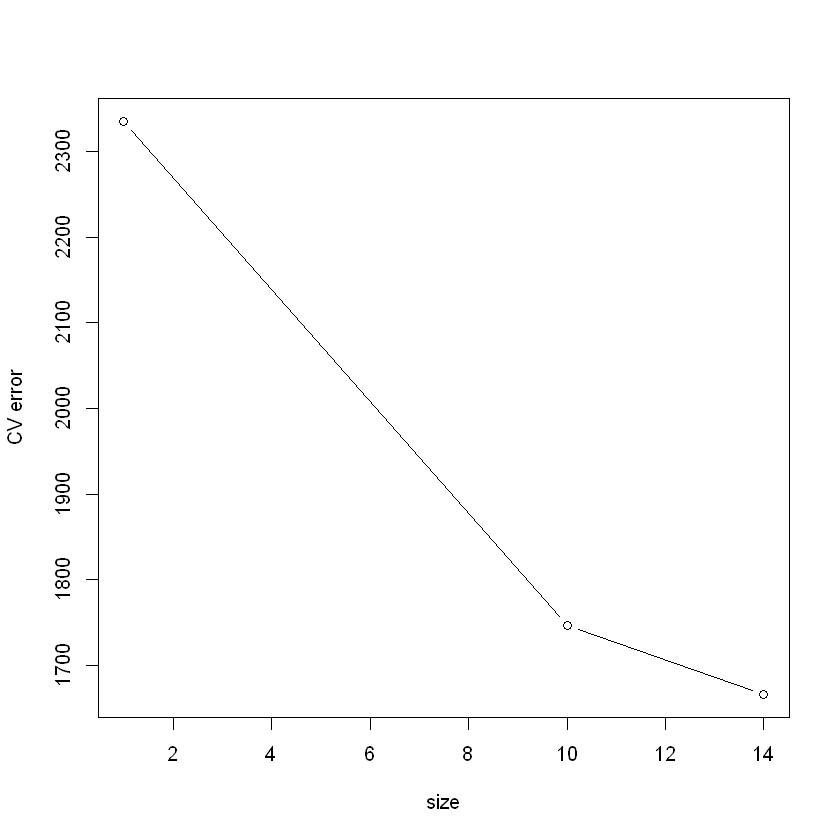

In [26]:
plot(tree.cv.ev$size, tree.cv.ev$dev, type = "b", xlab = "size", ylab = "CV error")

#### random forest

In [21]:
# the data set is highly imbalanced
prop.table(table(train$ev))


          0           1 
0.994410131 0.005589869 

In [22]:
train$ev <- as.factor(train$ev)
# generate data synthetically use ROSE 
ev_balanced_under <- ovun.sample(ev ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, method = "under", N = 2235*2, seed = 1)$data
table(ev_balanced_under$ev)


   0    1 
2135 2335 

Deal with catergorical variable in randomforest increase the complesity and computation time by a lot, so here i removed dayofweek feature first.


Call:
 randomForest(formula = ev ~ load + hourofday + dif + absdif +      max + var + entropy + nonlinear + hurst, data = ev_balanced_under,      ntree = 1000, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.9%
Confusion matrix:
     0    1 class.error
0 2091   44  0.02060890
1   41 2294  0.01755889

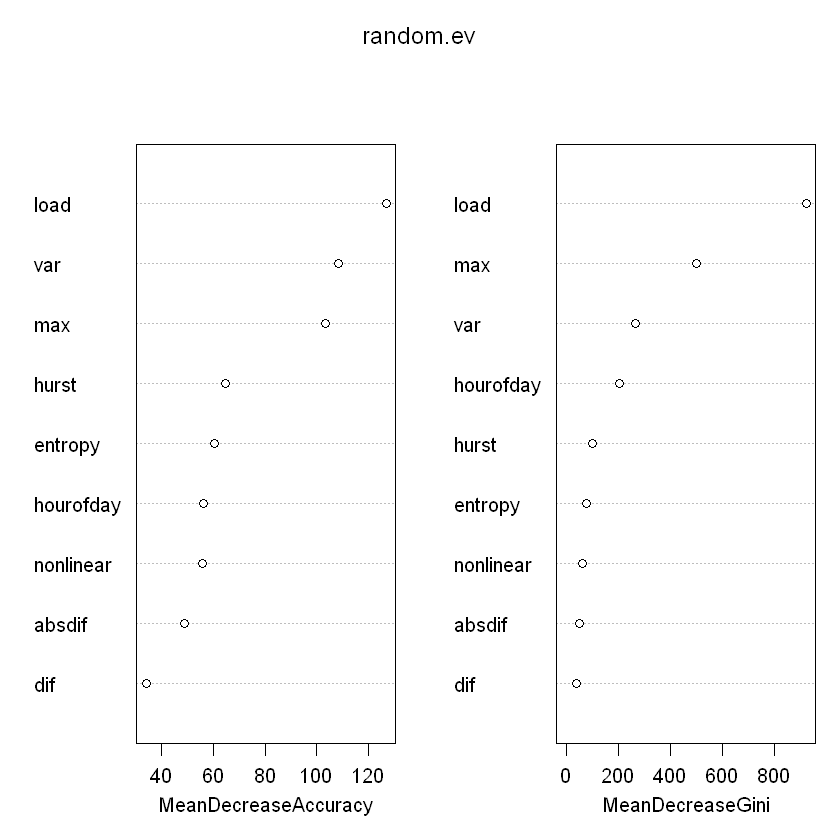

In [23]:
# use random forest to classify
random.ev <- randomForest(ev ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = ev_balanced_under, ntree = 1000, mtry=3, importance=TRUE)
# check the results 
random.ev

# plot importance of variable
varImpPlot(random.ev)

we use √p variables when building a random forest of classification trees. in this case square root of 9 is 3

The former is based
upon the mean decrease of accuracy in predictions on the out of bag samples
when a given variable is excluded from the model. The latter is a measure
of the total decrease in node impurity that results from splits over that
variable, averaged over all trees

Hourofday and load are by for the two most important variables.

In [24]:
# record error for tree
tree.error[4,] <- tree_error_record(random.ev, train$ev, train, "random.ev")

# check error
tree.error

Tree_type F1       
1 tree.ac   0.9513908
2 random.ac 0.9921908
3 NA               NA
4 random.ev 0.3491067

#### Boosting

In [43]:
train$ev = as.character(train$ev)
# generate values for lambda, to tune
pows = seq(-3, 1, bby = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)

# saave the results
boost.train.error = rep(NA, length.lambdas)


Warning message:
"In seq.default(-3, 1, bby = 0.1) :
 extra argument 'bby' will be disregarded"


In [47]:
for (i in 1:length.lambdas){
  # fit the boosting model with different lambda
  boost.ev = gbm(ev ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = ev_balanced_under, 
  distribution = "bernoulli", n.trees = 1000, shrinkage = lambdas[i])
  train.pred = predict(boost.ev, train, n.trees = 1000, type = "response")
  train.pred[train.pred<0.5] = 0
  train.pred[train.pred>0.5] = 1
  boost.train.error[i] = F1(train$ev, train.pred, positive = 1)
}

In [1]:
boost.train.error

ERROR: Error in eval(expr, envir, enclos): object 'boost.train.error' not found


In [ ]:
boost.ev = gbm(ev ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = ev_balanced_under, 
  distribution = "bernoulli", n.trees = 1000, cv.folds=5, shrinkage = 1)

Using  trees...




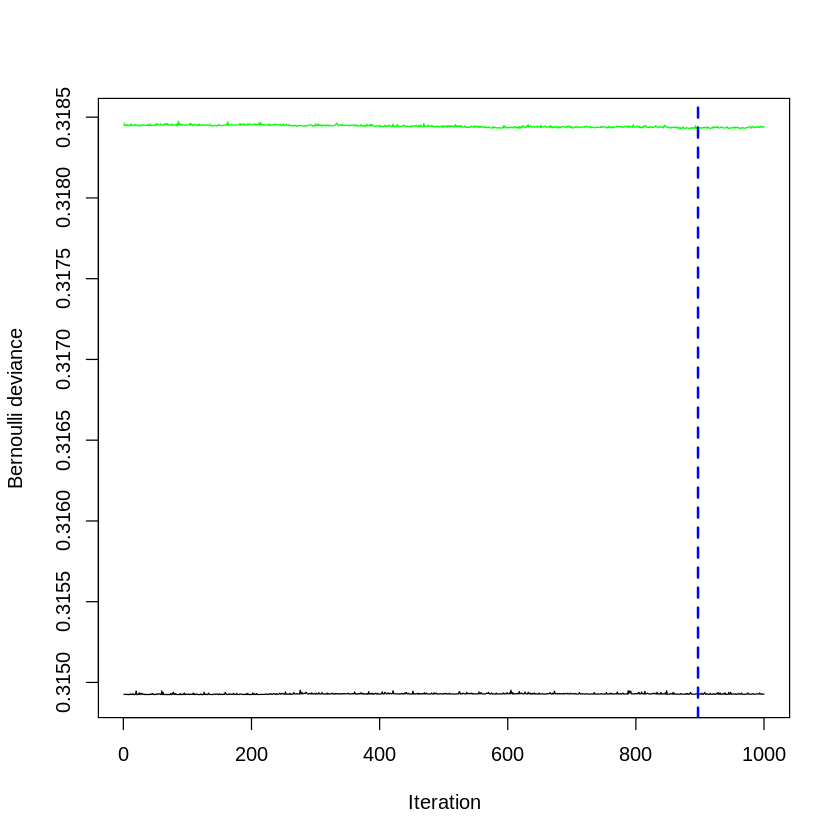

In [144]:
best.iter = gbm.perf(boost.ev, method="cv")

In [145]:
best.iter

[1] 897

In [147]:
set.seed(123)
fitControl = trainControl(method="cv", number=5, returnResamp = "all")

boost.ev = train(ev ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data=train, method="gbm",distribution="bernoulli", trControl=fitControl, verbose=F, tuneGrid=data.frame(.n.trees=best.iter, .shrinkage=1, .interaction.depth=1, .n.minobsinnode=1))

In [150]:
train.pred = predict(boost.ev, train, n.trees = 897)
F1(train$ev, train.pred, positive = 1)

[1] 0.004206984

In [151]:
boost.ev

Stochastic Gradient Boosting 

417720 samples
     9 predictor
     2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 334176, 334176, 334176, 334176, 334176 
Resampling results:

  Accuracy   Kappa      
  0.9943216  0.005536433

Tuning parameter 'n.trees' was held constant at a value of 897
Tuning

Tuning parameter 'shrinkage' was held constant at a value of 1

Tuning parameter 'n.minobsinnode' was held constant at a value of 1

#### svm

In [ ]:
Svm with linear give bad results, lets try radial

In [19]:
svm.table <- data.frame(Model_name = NA, F1 = NA)

In [ ]:
svm.dryer <- svm(dryer ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = dryer_balanced_under, kernel = "radial", cost = 500, gamma = 2)
svm.table[4,] <- svm.prediction(svm.dryer, train, train$dryer, "svm.dryer")

In [ ]:
svm.table

In [ ]:
svm.oven <- svm(oven ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = oven_balanced_under, kernel = "radial", cost = 1000, gamma = 2)
svm.table[3,] <- svm.prediction(svm.oven, train, train$oven, "svm.oven")
svm.wash <- svm(wash ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = wash_balanced_under, kernel = "radial", cost = 1000, gamma = 2)
svm.table[4,] <- svm.prediction(svm.wash, train, train$wash, "svm.wash")
svm.dryer <- svm(dryer ~ load + var + max + hourofday + hurst + nonlinear + absdif + dif + entropy, data = dryer_balanced_under, kernel = "radial", cost = 1000, gamma = 2)
svm.table[5,] <- svm.prediction(svm.dryer, train, train$dryer, "svm.dryer")


### 2.3. oven	

#### Classification Tree

In [35]:
# build the tree on training data
train$oven <- as.factor(train$oven)
tree.oven <- tree(oven ~ load + hourofday + dif + absdif + max + var + entropy + nonlinear + hurst, data = train ) 

In [36]:
# produce summary statistics about the tree
summary(tree.oven)


Classification tree:
tree(formula = oven ~ load + hourofday + dif + absdif + max + 
    var + entropy + nonlinear + hurst, data = train)
Variables actually used in tree construction:
[1] "max"       "load"      "absdif"    "hurst"     "var"       "hourofday"
Number of terminal nodes:  13 
Residual mean deviance:  0.06042 = 25240 / 417700 
Misclassification error rate: 0.01118 = 4670 / 417720 

The tree uses 6 variables 
* load
* max
* absdif
* var
* hurst
* hourofday

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.01118 for this classification tree. There are 13 terminal nodes in this tree.

null device 
          1

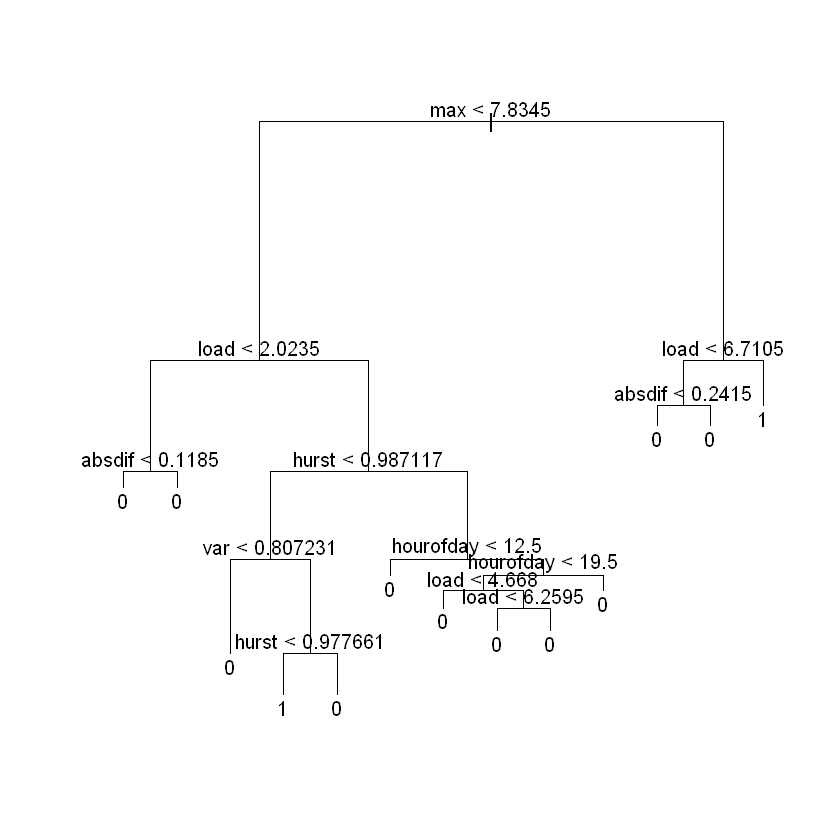

In [37]:
# visualize the tree
plot(tree.oven)
text(tree.oven, pretty = 0)
dev.off()

Max is the most important variable of the tree. The top three nodes are max and load

If load < 6.7105 , the tree predicts 0. 

if load > 6.7105, the tree predicts 1.

In [38]:
# record error of tree
tree.error[5,] <- tree_error_record(tree.oven, train$oven, train, "tree.oven")

In [39]:
# check train error of tree
tree.error

Tree_type F1       
1 tree.ac   0.9513908
2 random.ac 0.9999061
3 tree.ev   0.5616633
4 random.ev 0.3741687
5 tree.oven 0.5851102

#### random forest

In [28]:
# the data set is highly imbalanced
table(train$oven)


     0      1 
411764   5956 

In [37]:
train$oven <- as.factor(train$oven)
# generate data synthetically use ROSE 
oven_balanced_under <- ovun.sample(oven ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, method = "under", N = 5956*2, seed = 1)$data
table(oven_balanced_under$oven)


   0    1 
5956 5956 


Call:
 randomForest(formula = oven ~ load + hourofday + dif + absdif +      max + var + entropy + nonlinear + hurst, data = oven_balanced_under,      ntree = 1000, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.86%
Confusion matrix:
     0    1 class.error
0 5775  181 0.030389523
1   41 5915 0.006883815

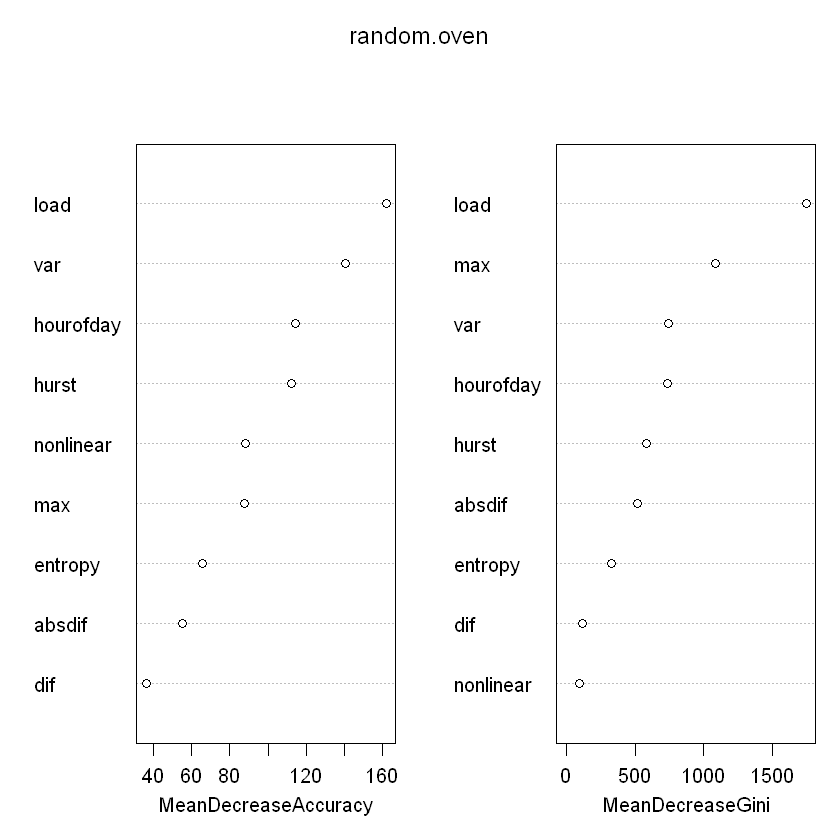

In [38]:
# use random forest to classify
random.oven <- randomForest(oven ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = oven_balanced_under, ntree = 1000, mtry=3, importance=TRUE)
# check the results 
random.oven
# plot importance of variable
varImpPlot(random.oven)

Nonlinear and load are by for the two most important variables.

In [39]:
# record error for tree
tree.error[6,] <- tree_error_record(random.oven, train$oven, train, "random.oven")

# check error
tree.error

Tree_type   F1       
1 tree.ac     0.9513908
2 random.ac   0.9921908
3 NA                 NA
4 random.ev   0.3491067
5 NA                 NA
6 random.oven 0.4925367
7 tree.wash   0.0000000

### 2.4. wash

#### Classification tree

In [32]:
# build the tree on training data
train$wash <- as.factor(train$wash)
tree.wash <- tree(wash ~ load + hourofday + dif + absdif + max + var + entropy + nonlinear + hurst, data = train ) 

In [33]:
# produce summary statistics about the tree
summary(tree.wash)


Classification tree:
tree(formula = wash ~ load + hourofday + dif + absdif + max + 
    var + entropy + nonlinear + hurst, data = train)
Variables actually used in tree construction:
[1] "absdif"    "hourofday"
Number of terminal nodes:  3 
Residual mean deviance:  0.178 = 74370 / 417700 
Misclassification error rate: 0.01904 = 7953 / 417720 

The tree only uses 2 variables 
* absdif
* hourofday

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.01904 for this classification tree. There are 3 terminal nodes in this tree.

null device 
          1

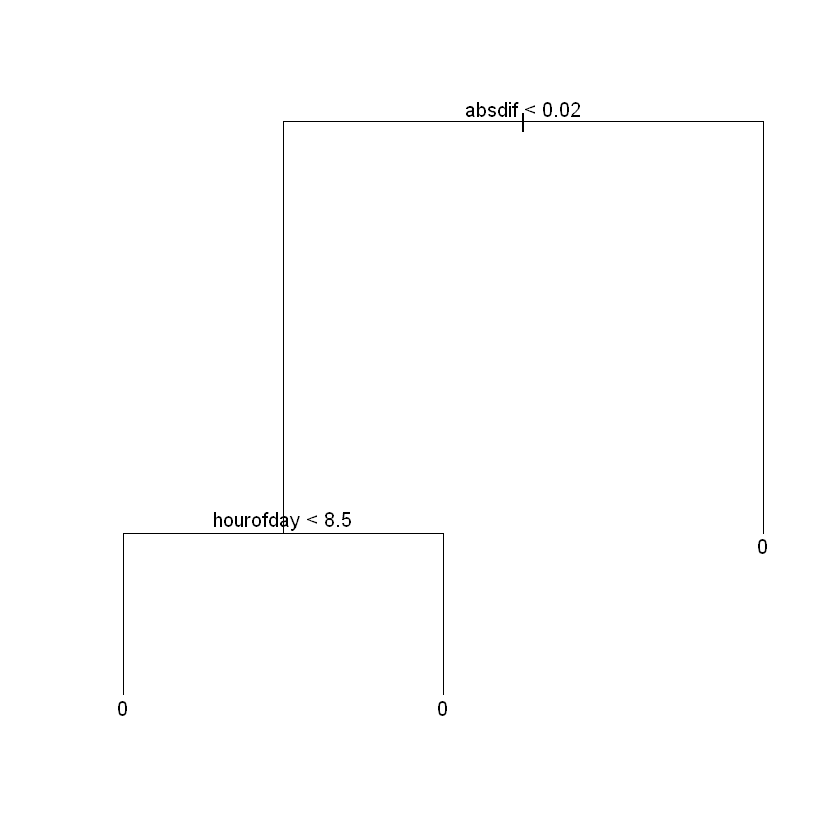

In [34]:
# visualize the tree
plot(tree.wash)
text(tree.wash, pretty = 0)
dev.off()

absdif is the most important variable of the tree.

But tree classify all of them as 0.

Not a good model.

In [35]:
# record error of tree
tree.error[7,] <- tree_error_record(tree.wash, train$wash, train, "tree.wash")

In [36]:
# check train error of tree
tree.error

Tree_type F1       
1 tree.ac   0.9513908
2 random.ac 0.9921908
3 NA               NA
4 random.ev 0.3491067
5 NA               NA
6 NA               NA
7 tree.wash 0.0000000

As all predicitions are labeled "0", the measurements are 0, as positive is label "1"

#### random forest

In [34]:
# the data set is highly imbalanced
table(train$wash)


     0      1 
409767   7953 

In [40]:
train$wash <- as.factor(train$wash)
# generate data synthetically use ROSE 
wash_balanced_under <- ovun.sample(wash ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, method = "under", N = 7953*2, seed = 1)$data
table(wash_balanced_under$wash)


   0    1 
7953 7953 


Call:
 randomForest(formula = wash ~ load + hourofday + dif + absdif +      max + var + entropy + nonlinear + hurst, data = wash_balanced_under,      ntree = 1000, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.9%
Confusion matrix:
     0    1 class.error
0 6721 1232  0.15491010
1  502 7451  0.06312083

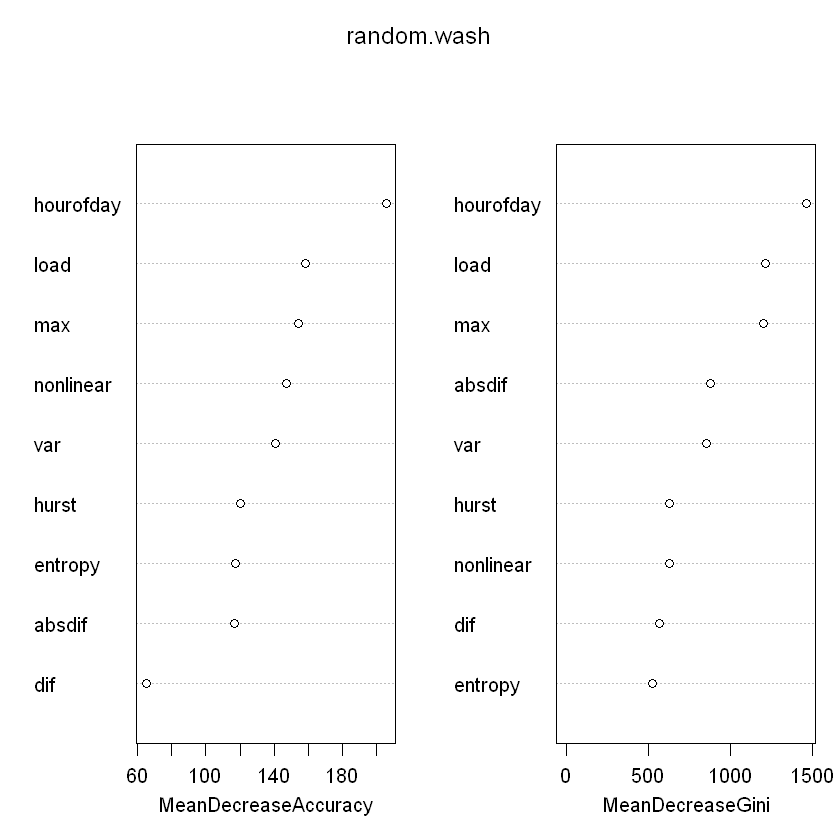

In [41]:
# use random forest to classify
random.wash <- randomForest(wash ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = wash_balanced_under, ntree = 1000, mtry=3, importance=TRUE)
# check the results 
random.wash

# plot importance of variable
varImpPlot(random.wash)

Hourofday and max are by for the two most important variables.

In [42]:
# record error for tree
tree.error[8,] <- tree_error_record(random.wash, train$wash, train, "random.wash")
# check error
tree.error

Tree_type   F1       
1 tree.ac     0.9513908
2 random.ac   0.9921908
3 NA                 NA
4 random.ev   0.3491067
5 NA                 NA
6 random.oven 0.4925367
7 tree.wash   0.0000000
8 random.wash 0.2035134

### 2.5. dryer

#### Classification tree

In [61]:
# build the tree on training data
train$dryer <- as.factor(train$dryer)
tree.dryer <- tree(dryer ~ load + hourofday + dayofweek + dif + absdif + max + var + entropy + nonlinear + hurst, data = train ) 

Warning message in tree(dryer ~ load + hourofday + dayofweek + dif + absdif + max + :
"NAs introduced by coercion"


In [62]:
# produce summary statistics about the tree
summary(tree.dryer)


Classification tree:
tree(formula = dryer ~ load + hourofday + dayofweek + dif + absdif + 
    max + var + entropy + nonlinear + hurst, data = train)
Variables actually used in tree construction:
[1] "load"      "hourofday"
Number of terminal nodes:  5 
Residual mean deviance:  0.2444 = 102100 / 417700 
Misclassification error rate: 0.0325 = 13576 / 417720 

The tree only uses 2 variables 
* load
* hourofday

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.0325 for this classification tree. There are 5 terminal nodes in this tree.

null device 
          1

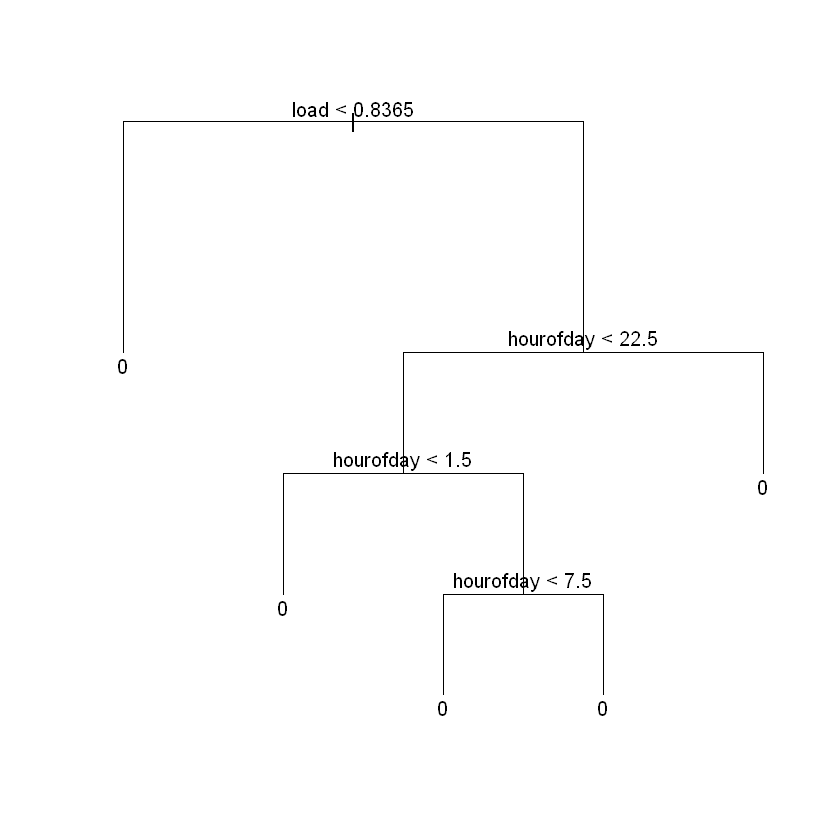

In [63]:
# visualize the tree
plot(tree.dryer)
text(tree.dryer, pretty = 0)
dev.off()

Load is the most important variable of the tree.

But tree classify all of them as 0.

Not a good model.

In [64]:
# record error of tree
tree.error[9,] <- tree_error_record(tree.dryer, train$dryer, train, "tree.dryer")

Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


In [65]:
# check train error of tree
tree.error

Tree_type   F1       
1 tree.ac     0.9513908
2 random.ac   0.9999061
3 tree.ev     0.5616633
4 random.ev   0.3741687
5 tree.oven   0.5851102
6 random.oven 0.4925367
7 tree.wash   0.0000000
8 random.wash 0.2042766
9 tree.dryer  0.0000000

Same as tree classification for wash, all predicitions are labeled "0", the measurements are 0, as positive is label "1"

#### random forest

In [38]:
# the data set is highly imbalanced
table(train$dryer)


     0      1 
404144  13576 

In [43]:
train$dryer <- as.factor(train$dryer)
# generate data synthetically use ROSE 
dryer_balanced_under <- ovun.sample(dryer ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = train, method = "under", N = 13576*2, seed = 1)$data
table(dryer_balanced_under$dryer)


    0     1 
13576 13576 


Call:
 randomForest(formula = dryer ~ load + hourofday + dif + absdif +      max + var + entropy + nonlinear + hurst, data = dryer_balanced_under,      ntree = 1000, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 7.14%
Confusion matrix:
      0     1 class.error
0 11992  1584  0.11667649
1   355 13221  0.02614909

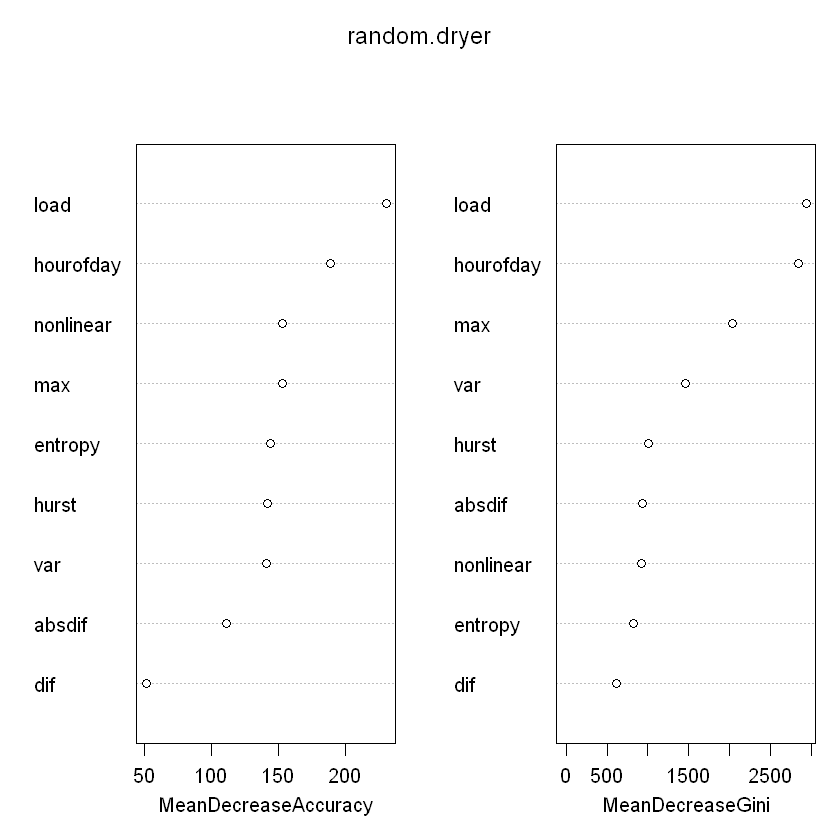

In [44]:
# use random forest to classify
random.dryer <- randomForest(dryer ~ load + hourofday + dif + absdif + max + var + entropy + 
                          nonlinear + hurst, data = dryer_balanced_under, ntree = 1000, mtry=3, importance=TRUE)
# check the results 
random.dryer

# plot importance of variable
varImpPlot(random.dryer)

Hourofday and max are by for the two most important variables.

In [45]:
# record error for tree
tree.error[10,] <- tree_error_record(random.dryer, train$dryer, train, "random.dryer")
# check error
tree.error

Tree_type    F1       
1  tree.ac      0.9513908
2  random.ac    0.9921908
3  NA                  NA
4  random.ev    0.3491067
5  NA                  NA
6  random.oven  0.4925367
7  tree.wash    0.0000000
8  random.wash  0.2035134
9  NA                  NA
10 random.dryer 0.3682676

## 3. Generate output 

In [51]:
NN.model <- h2o.deeplearning(    
            x = 2:ncol(ac.data), # select all features
            y = 1,
            training_frame = ac.data, # specify the frame (imported file)    
            hidden = c(2), # number of layers and their units
            epochs = 50, # maximum number of epoches  
            activation = 'Tanh', # activation function 
            autoencoder = FALSE, # is it an autoencoder? NO!
            l2 = 0.1
)

# predict train labels using the model 
test.predict <- h2o.predict(NN.model, test.frame)$predict
test.predict <- as.numeric(as.vector(test.predict[,1]))

  |======================================================================| 100%
  |======================================================================| 100%


In [86]:
# Prediction on test data
# estimate test labels
test.predict.ac <- test.predict
#test.predict.ac <- predict(random.ac, test, "class")
test.predict.ev <-predict(random.ev, test, type="class")
#test.predict.ev <- predict(svm.ev, test)
test.predict.oven <- predict(random.oven, test, type="class")
test.predict.wash <- predict(random.wash, test, type="class")
test.predict.dryer <- predict(random.dryer, test, type="class")

In [87]:
output <- data.frame(id = 1:105540, ac = test.predict.ac, ev = test.predict.ev, oven = test.predict.oven, 
                     wash = test.predict.wash, dryer = test.predict.dryer)

In [88]:
write.csv(output, "./pred_labels.csv", row.names = FALSE)